## Introducción al Machine Learning 
### Curva ROC 

#### Solución a Ejercicios Propuestos

#### Propuesta Ejercicios
1. Probar cambiar valores distintos de la profundidad del árbol para visualizar el efecto del overfitting
2. Utilizar la función *auc* para calcular el área de la curva ROC, interpretando adecuadamente  la documentación de sus parámetros
3. Tranformar el código de la curva ROC en una función que la dibuje a partir de un modelo, las características y las etiquetas del conjunto de test.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
bank = pd.read_csv('../../data/bank.csv', sep=";")

In [7]:
raw_features = bank.drop(columns='y')
ft_df = pd.get_dummies(raw_features)
features = ft_df.values
target = bank.y

___

Separación del conjunto en train/test que ya conocemos

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.3,
                                                    stratify=target)

Entrenameros arboles de decisión

In [9]:
tree = DecisionTreeClassifier(max_depth=5)
tree = tree.fit(x_train, y_train)
print(tree.classes_)

['no' 'yes']


La clase de interés en nuestro problema es la etiqueta 'yes', por lo que 
nos interesa calcular los ratios en referencia a dicha clase.
La predicción probabilística corresponde a la posición 1

In [10]:
test_pred = tree.predict_proba(x_test)
test_posprob = test_pred[:,1]

train_pred = tree.predict_proba(x_train)
train_posprob = train_pred[:,1]

___

1. Para probar el efecto de overfitting se puede cambiar el max_depth en la construcción 
del árbol más arriba

2. Calculamos el área de la curva ROC con la función auc

In [11]:
from sklearn.metrics import auc

In [12]:
fpr, tpr, thr = roc_curve(y_test, test_posprob, pos_label='yes')
auc(fpr, tpr)


0.8168540105467667

Podemos obetner lo mismo directamente con la funcion 

In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
roc_auc_score(y_test, test_posprob)

0.8168540105467667

3. Función para generar la curva ROC

In [42]:
def generar_roc(modelo, etiqueta_interes, features, labels,
                feat_train=None,
                labels_train=None):
    """
     - modelo: clasificador binario ya entrenado
     - etiqueta_interes: Valor de la clase binaria que queremos predecir. Ej. 'yes' o 'positiva'
     - features, labels: Características y etiquetas de test
     - feat_train, labels_train: opcionales por si queremos incluir la ROC de entrenamiento 
    """
    # hacemos la prediccion sobre la clase de interes
    id_interes = np.where(modelo.classes_ == etiqueta_interes)[0][0]
    prob = modelo.predict_proba(features)
    interes_prob = prob[:,id_interes]
    
    # pedimos los ratios para diferentes umbrales
    fpr, tpr, thr = roc_curve(labels, interes_prob, pos_label=etiqueta_interes)
    
    # Calculamos lo mismo para train, si nos han pasado dichos parametros
    if feat_train is not None:
        prob_train = modelo.predict_proba(feat_train)
        pos_prob_train = prob_train[:,id_interes]
        fpr_train, tpr_train, _ = roc_curve(labels_train, 
                                            pos_prob_train, 
                                            pos_label=etiqueta_interes)
    
    # Hacemos la gráfica
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(fpr, tpr, color='r', label='test')
    
    if feat_train is not None:
        plt.plot(fpr_train, tpr_train, color='g', label='train')

    plt.plot([0,1],[0,1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.0])
    plt.legend(loc='lower right')

Probamos nuestra función

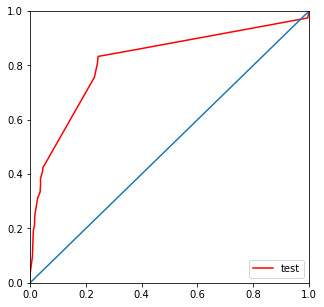

In [43]:
generar_roc(tree, 'yes', x_test, y_test)

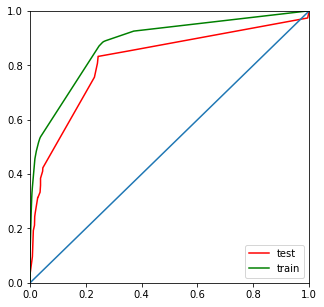

In [44]:
generar_roc(tree, 'yes', x_test, y_test,
            feat_train=x_train,
            labels_train=y_train)


___